Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018.

In [48]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

---

Let's load the Gas production:

In [49]:
file = 'U.S._natural_gas_production.csv'
gas_df = pd.read_csv(file, decimal = ',')
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [50]:
gas_df.shape

(121, 20)

In [51]:
gas_df.dtypes[0:2]

Month    object
U.S.      int64
dtype: object

In [52]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [53]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')

In [54]:
gas_df.dtypes

Month                               datetime64[ns]
U.S.                                         int64
Alaska                                       int64
Arkansas                                     int64
Kansas                                       int64
Other States                                 int64
Federal Offshore--Gulf of Mexico             int64
Wyoming                                      int64
West Virginia                                int64
Utah                                         int64
Pennsylvania                                 int64
Texas                                        int64
Oklahoma                                     int64
Ohio                                         int64
North Dakota                                 int64
New Mexico                                   int64
Montana                                      int64
Louisiana                                    int64
Colorado                                     int64
California                     

In [55]:
gas_df.head()

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881
3,2008-09-01,63984,9221,1316,1032,2953,2100,6447,657,1276,542,20435,5224,224,260,4069,330,2960,4049,890
4,2008-10-01,69464,9674,1375,1026,3113,4368,6909,692,1241,543,21948,5126,236,267,4168,330,3718,3860,870


In [56]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [57]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

In [58]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()

In [59]:
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


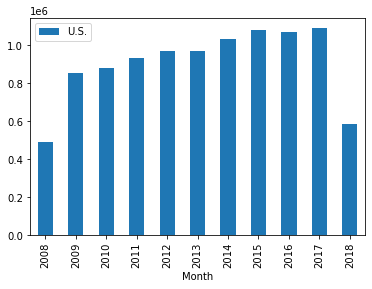

In [60]:
plot = yearly_gas_df.filter(items = ["U.S."]).plot(kind="bar")

In [61]:
plot.set_xlabel("Year")

Text(0.5, 17.200000000000003, 'Year')

Text(0.5, 0, 'Year')

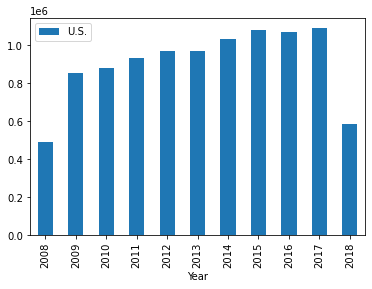

In [62]:
plot = yearly_gas_df.filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

In [63]:
np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [64]:
Full_years = np.logical_and(yearly_gas_df.index >= 2009, yearly_gas_df.index <= 2017)
yearly_gas_df[Full_years]

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723
2017,1090730,106969,23050,7247,17069,35592,56410,52609,10312,179644,260314,82616,58702,22577,43910,1577,69947,55546,6642


Text(0.5, 0, 'Year')

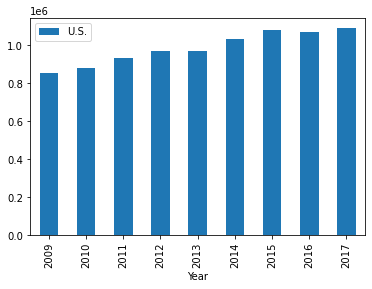

In [65]:
plot = yearly_gas_df[Full_years].filter(items=['U.S.']).plot(kind="bar")
plot.set_xlabel("Year")

---

## Comparing with Crude Oil Production

In [101]:
file_oil = 'U.S._crude_oil_production.csv'
oil_df = pd.read_csv(file_oil, decimal = ',')
oil_df.head()

,Month,U.S. Crude Oil,Alabama,Alaska,Arkansas,Arizona,California,Colorado,Federal Offshore Gulf of Mexico Crude Oil,Federal Offshore Pacific Crude Oil,...,Ohio,Oklahoma,Pennsylvania,South Dakota,Wyoming,West Virginia,Virginia,Utah,Texas,Tennessee
0,2008-06-01,5138,21,655,17,0,583,82,1326,67,...,14,186,8,5,144,6,0,60,1097,1
1,2008-07-01,5177,21,640,17,0,586,81,1372,61,...,14,184,8,5,145,5,0,61,1111,1
2,2008-08-01,5003,21,544,17,0,588,82,1272,70,...,14,188,8,5,145,6,0,62,1110,1
3,2008-09-01,3974,21,681,16,0,587,88,242,67,...,14,186,8,5,144,6,0,63,1055,1
4,2008-10-01,4738,21,716,17,0,586,86,803,66,...,14,185,8,5,145,6,0,64,1125,1


In [102]:
oil_df.dtypes

Month                                        object
U.S. Crude Oil                                int64
Alabama                                       int64
Alaska                                        int64
Arkansas                                      int64
Arizona                                       int64
California                                    int64
Colorado                                      int64
Federal Offshore Gulf of Mexico Crude Oil     int64
Federal Offshore Pacific Crude Oil            int64
Florida                                       int64
Idaho                                         int64
Illinois                                      int64
Indiana                                       int64
Kansas                                        int64
Kentucky                                      int64
Louisiana                                     int64
Michigan                                      int64
Mississippi                                   int64
Missouri    

In [103]:
oil_df['Month'] = pd.to_datetime(oil_df['Month'], format='%Y-%m-%d')

In [105]:
oil_df.dtypes

Month                                        datetime64[ns]
U.S. Crude Oil                                        int64
Alabama                                               int64
Alaska                                                int64
Arkansas                                              int64
Arizona                                               int64
California                                            int64
Colorado                                              int64
Federal Offshore Gulf of Mexico Crude Oil             int64
Federal Offshore Pacific Crude Oil                    int64
Florida                                               int64
Idaho                                                 int64
Illinois                                              int64
Indiana                                               int64
Kansas                                                int64
Kentucky                                              int64
Louisiana                               

In [107]:
yearly_oil = oil_df.groupby(oil_df['Month'].dt.year).sum().filter(items=['U.S. Crude Oil '])
yearly_oil.columns = [ 'Crude Oil' ]
yearly_oil.head(3)

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741


In [108]:
yearly_oil

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741
2011,67829
2012,78007
2013,89585
2014,105064
2015,113179
2016,105970


In [109]:
yearly_gas = yearly_gas_df.filter(items = ["U.S."])
yearly_gas

,U.S.
Month,
2008,489473
2009,856876
2010,881622
2011,936163
2012,968632
2013,970617
2014,1032439
2015,1082158
2016,1070085


In [78]:
yearly_gas.columns = ["Gas"]

In [79]:
yearly_gas

,Gas
Month,
2008,489473
2009,856876
2010,881622
2011,936163
2012,968632
2013,970617
2014,1032439
2015,1082158
2016,1070085


In [110]:
yearly_oil

,Crude Oil
Month,
2008,34211
2009,64180
2010,65741
2011,67829
2012,78007
2013,89585
2014,105064
2015,113179
2016,105970


In [111]:
yearly_merged = pd.concat([yearly_gas , yearly_oil], axis = 1)

In [112]:
yearly_merged

,U.S.,Crude Oil
Month,,
2008,489473,34211
2009,856876,64180
2010,881622,65741
2011,936163,67829
2012,968632,78007
2013,970617,89585
2014,1032439,105064
2015,1082158,113179
2016,1070085,105970


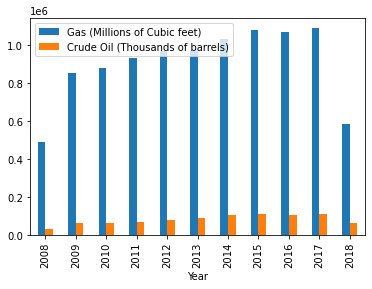

In [113]:
plot_together = yearly_merged.plot(kind="bar")
plot_together.set_xlabel("Year")
plot_together.legend(['Gas (Millions of Cubic feet)', 'Crude Oil (Thousands of barrels)'])

### State production

Let's have a look at the yearly production of some specific states

In [115]:
yearly_gas_df.columns[1:].sort_values()

Index(['Alaska', 'Arkansas', 'California', 'Colorado',
       'Federal Offshore--Gulf of Mexico', 'Kansas', 'Louisiana', 'Montana',
       'New Mexico', 'North Dakota', 'Ohio', 'Oklahoma', 'Other States',
       'Pennsylvania', 'Texas', 'Utah', 'West Virginia', 'Wyoming'],
      dtype='object')

Text(0.5, 0, 'Year')

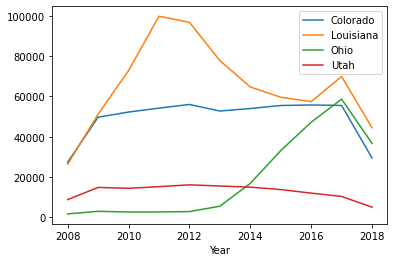

In [116]:
plot = yearly_gas_df.filter(items=['Colorado', 'Louisiana', 'Ohio', 'Utah']).plot()
plot.set_xlabel("Year")